# Paria Rezayan 
# Linear Regression



# Introduction:
The prediction of energy consumption has always been an important topic in the field of energy management. The aim of this project is to develop a model that can predict the energy use of house appliances based on certain features. To achieve this, I will explore and preprocess the dataset, perform exploratory data analysis (EDA), scale the data using Standard Scaler, and finally implement a Linear Regression model both from scratch and using Sklearn.

# Dataset:
The dataset used in this regression project can be found on https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction. It contains data related to the energy consumption of different household appliances with 19735 rows and 29 columns. The raw data includes temporal information such as date and time, along with various environmental factors such as humidity and temperature.

# Objective:
The main objective of this project is to create a Linear Regression model that can accurately predict the energy consumption of household appliances based on certain features. The Linear Regression model will help us identify which specific features affect energy consumption the most and how they relate to each other.

# Methodology:
1) Exploring the dataset and looking for any missing or non-numerical data points 
2) Preprocessing the data by removing the date column, checking for and removing outlier data using two distinct techniques: Z Score and Interquartile Range (IQR)
3) Perform EDA using histograms, distplots, and box plots to visualize the distribution of each feature in the dataset
4) Scaling the preprocessed data using the Standard Scaler technique to ensure that all features were within a similar range
5) Implemented a Linear Regression model both from scratch and using Sklearn to predict the energy use of house appliances based on the defined features
6) Evaluating the model's performance using Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R2 score




In [33]:
# importing the necessary libraries 
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 999
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn import metrics
from sklearn.metrics import classification_report

In [34]:
# loading the dataset 
data = pd.read_csv('energydata_complete.csv')

# Exploring the dataset:

In [35]:
# getting to know the dataset
data.shape

(19735, 29)

The raw data consists of 19735 rows and 29 columns.

Having known the shape of the data, it is time to familiarize ourselves with some additional information about the data: 

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

Attribute Information:

1. date time year-month-day hour:minute:second
2. Appliances, energy use in Wh
3. lights, energy use of light fixtures in the house in Wh
4. T1, Temperature in kitchen area, in Celsius
5. RH_1, Humidity in kitchen area, in %
6. T2, Temperature in living room area, in Celsius
7. RH_2, Humidity in living room area, in %
8. T3, Temperature in laundry room area
9. RH_3, Humidity in laundry room area, in %
10. T4, Temperature in office room, in Celsius
11. RH_4, Humidity in office room, in %
12. T5, Temperature in bathroom, in Celsius
13. RH_5, Humidity in bathroom, in %
14. T6, Temperature outside the building (north side), in Celsius
15. RH_6, Humidity outside the building (north side), in %
16. T7, Temperature in ironing room , in Celsius
17. RH_7, Humidity in ironing room, in %
18. T8, Temperature in teenager room 2, in Celsius
19. RH_8, Humidity in teenager room 2, in %
20. T9, Temperature in parents room, in Celsius
21. RH_9, Humidity in parents room, in %
22. To, Temperature outside (from Chievres weather station), in Celsius
23. Pressure (from Chievres weather station), in mm Hg
24. RH_out, Humidity outside (from Chievres weather station), in %
25. Wind speed (from Chievres weather station), in m/s
26. Visibility (from Chievres weather station), in km
27. Tdewpoint (from Chievres weather station), Â°C
28. rv1, Random variable 1, nondimensional
29. rv2, Random variable 2, nondimensional

In [37]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [38]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [39]:
# checking for non-numeric data points
data.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

As demonstrated, all the features, except for the 'date' column, contain numerical values. Not having a significant role in the outcome of the model, the 'date' is better to be removed. 

In [40]:
# removing the date column
data = data.drop(['date'], axis=1)

Calculating the range of each column to get an idea of how spread out the data is:

In [41]:
# calculating the range of each column
ranges = {}
for col in data.columns:
        ranges[col] = data[col].max() - data[col].min()

# printing the ranges
for key, value in ranges.items():
    print(f"{key}: {value}")

Appliances: 1070
lights: 70
T1: 9.470000000000002
RH_1: 36.3366666666667
T2: 13.7566666666667
RH_2: 35.563333333333404
T3: 12.036000000000001
RH_3: 21.396666666666597
T4: 11.1
RH_4: 23.430000000000003
T5: 10.465000000000002
RH_5: 66.5066666666667
T6: 34.355
RH_6: 98.9
T7: 10.61
RH_7: 28.2
T8: 10.9233333333333
RH_8: 29.18
T9: 9.61
RH_9: 24.160000000000004
T_out: 31.1
Press_mm_hg: 43.0
RH_out: 76.0
Windspeed: 14.0
Visibility: 65.0
Tdewpoint: 22.1
rv1: 49.99120800057426
rv2: 49.99120800057426


# Data Preprocessing: 

Since null values can cause errors and inaccuracies in the fitting of our regression model, it is better to check for them:

In [42]:
# cheking for total count of NaN values
print(data.isnull().sum().sum())

0


Subsequently, it is time to detect and remove outlier or trajectory data to improve the accuracy of the model by preventing biased results:

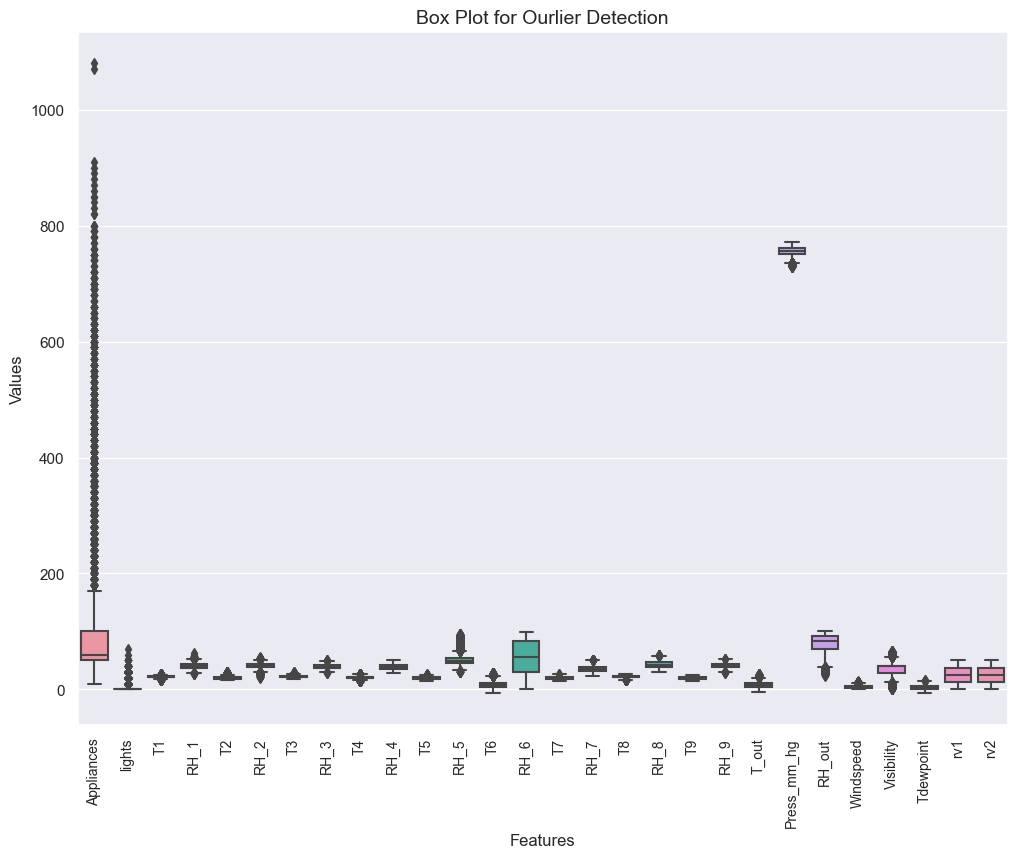

In [43]:
# detecting outlier data by using a box plot
sns.set(rc={'figure.figsize':(12,9)})
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_title('Box Plot for Ourlier Detection', fontsize=14)
plt.show()

Judging from the overall plot above, 'Appliances' has a lot of outlier data which may interve with the fitting of our model later on. Hence, it needs to be cleansed of outliers. 

Here is a better look at the 'Appliances' column:

<Axes: >

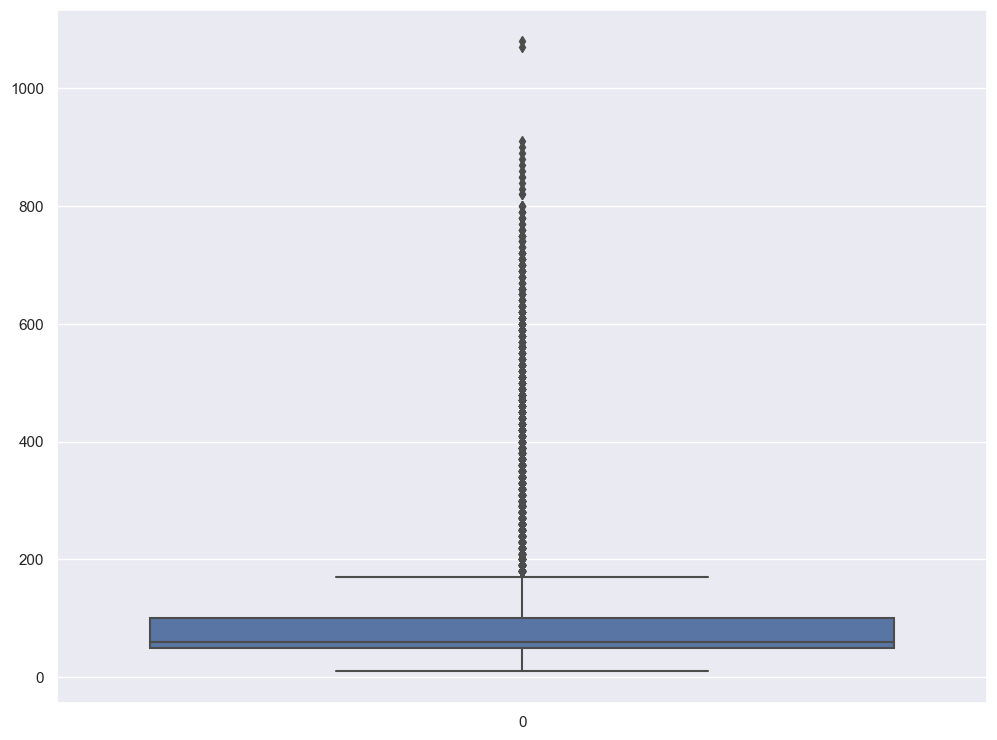

In [44]:
# box Plot for Appliances
sns.boxplot(data['Appliances'])

According to the plot above, the data points above **180** can be considered **trajactory**. 

In [45]:
# positioning the Outlier data in Appliances
print(np.where(data['Appliances']>180))

(array([   10,    11,    12, ..., 19732, 19733, 19734], dtype=int64),)


Removing outliers in the dataset using *2 distinct techniques*:

**Technique 1: Z Score**

In [46]:
# calculating Z-scores for each data point
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values
z_scores = np.abs(stats.zscore(y))
print(z_scores)

[3.30126384 3.30126384 3.30126384 ... 0.78103476 0.78103476 0.78103476]


In [47]:
# defining a threshold 
threshold = 3
 
# positioning the outlier
print(np.where(z_scores > 2))

(array([    0,     1,     2, ..., 19622, 19623, 19624], dtype=int64),)


In [48]:
# getting the indices of the outliers
outlier_indices = np.where(z_scores > threshold)

# dropping rows based on outlier index
data = data.drop(index=outlier_indices[0])

Now that we have cleaned the outliers using Z Score, the new shape of the data is as follows:

In [49]:
#priting the size of the new dataset afetr removing outliers using Z Score 
print("New Shape: ", data.shape)

New Shape:  (19088, 28)


**Technique 2: IQR (Interquartile Range)**

In [50]:
# calculating the IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Appliances     50.000000
lights          0.000000
T1              1.873333
RH_1            5.676667
T2              2.743333
RH_2            5.396667
T3              2.566667
RH_3            4.726667
T4              2.614881
RH_4            6.530000
T5              2.376667
RH_5            8.152500
T6              7.703333
RH_6           53.294062
T7              2.930000
RH_7            7.461944
T8              2.600000
RH_8            7.391894
T9              2.533333
RH_9            5.760833
T_out           6.783333
Press_mm_hg     9.966667
RH_out         21.630952
Windspeed       3.500000
Visibility     11.000000
Tdewpoint       5.670833
rv1            25.048739
rv2            25.048739
dtype: float64


In [51]:
# removing the outliers
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

And here below is the shape of the data after being cleansed of outliers using IQR:

In [52]:
# priting the size of the new dataset afetr removing outliers using IQR 
print("New Shape: ", data.shape)

New Shape:  (10537, 28)


A glance at the two new shapes reveals that in comparison to Z Score, IQR is more effective in detecting the outliers

# EDA: 

First, I will be using a histogram to visualize the distribution of each feature in the dataset.

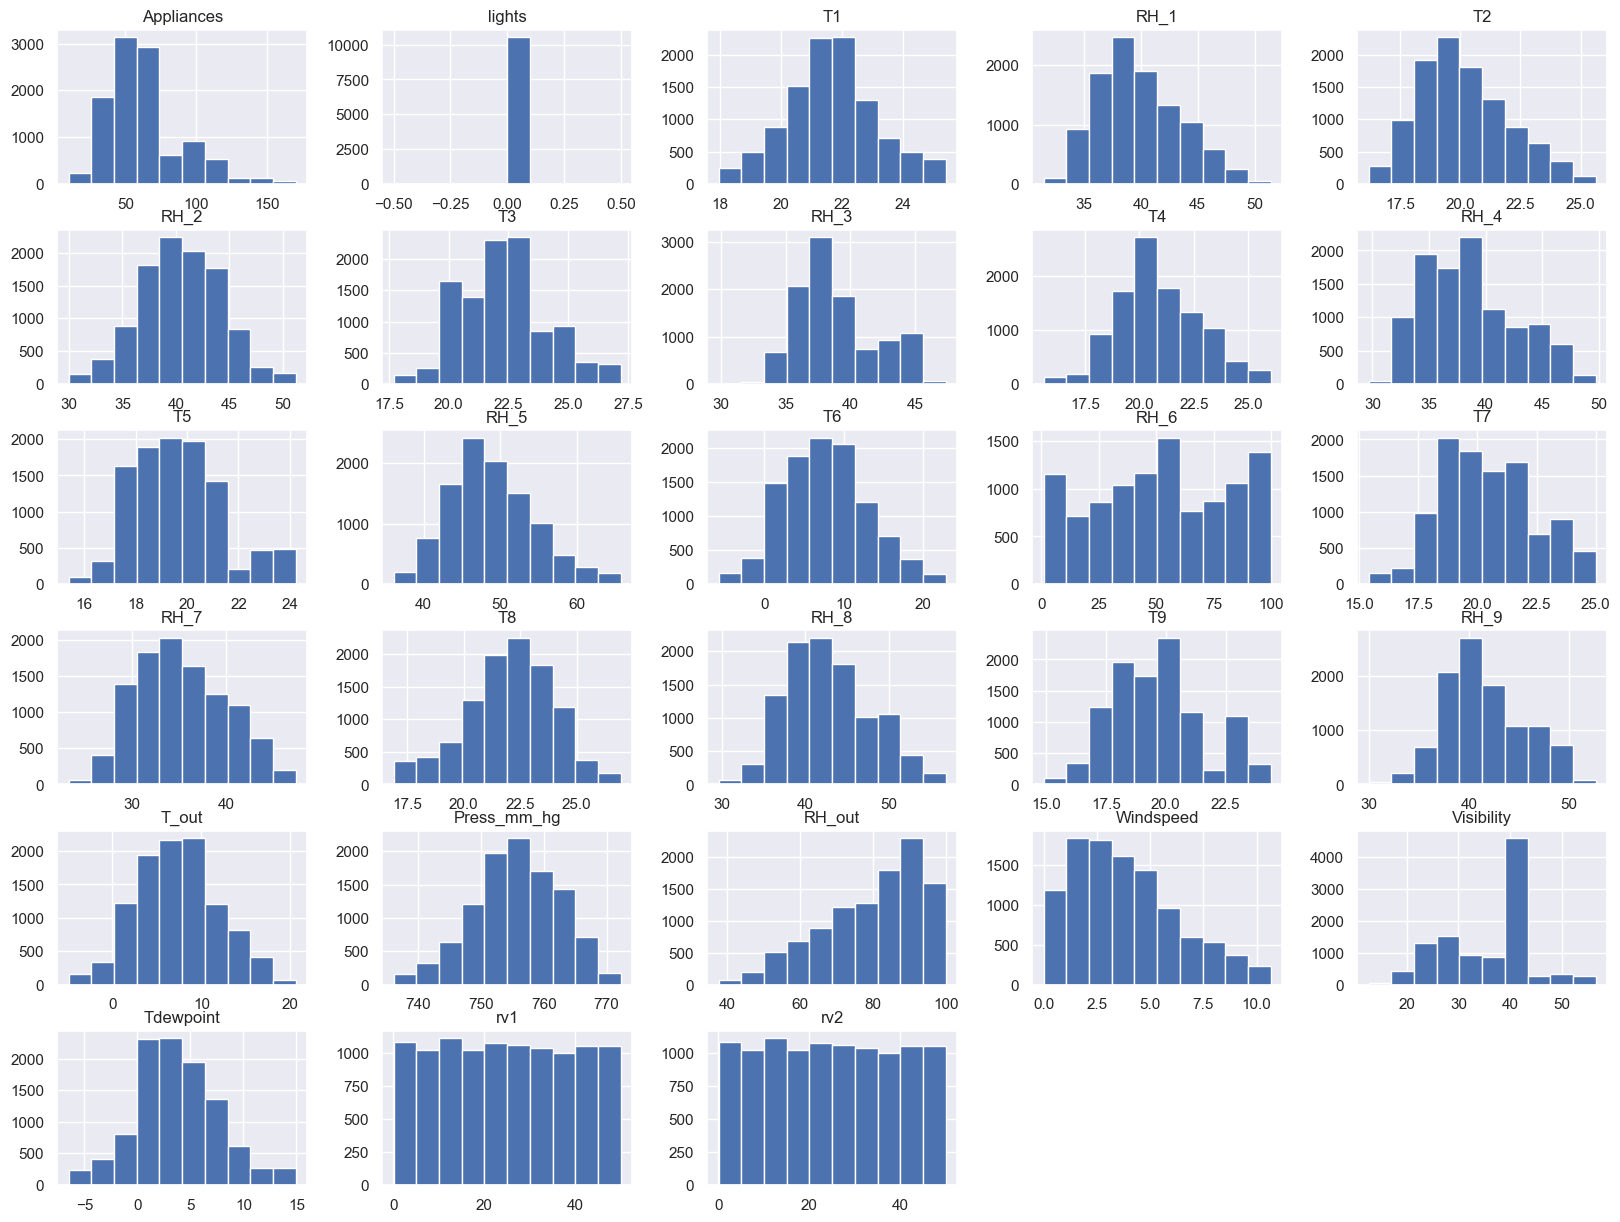

In [53]:
# creating a histogram of all the features.
data.hist(figsize=(20, 15))
plt.show()

Next, a box plot is drawn to to compare the distributions of different features in the dataset:

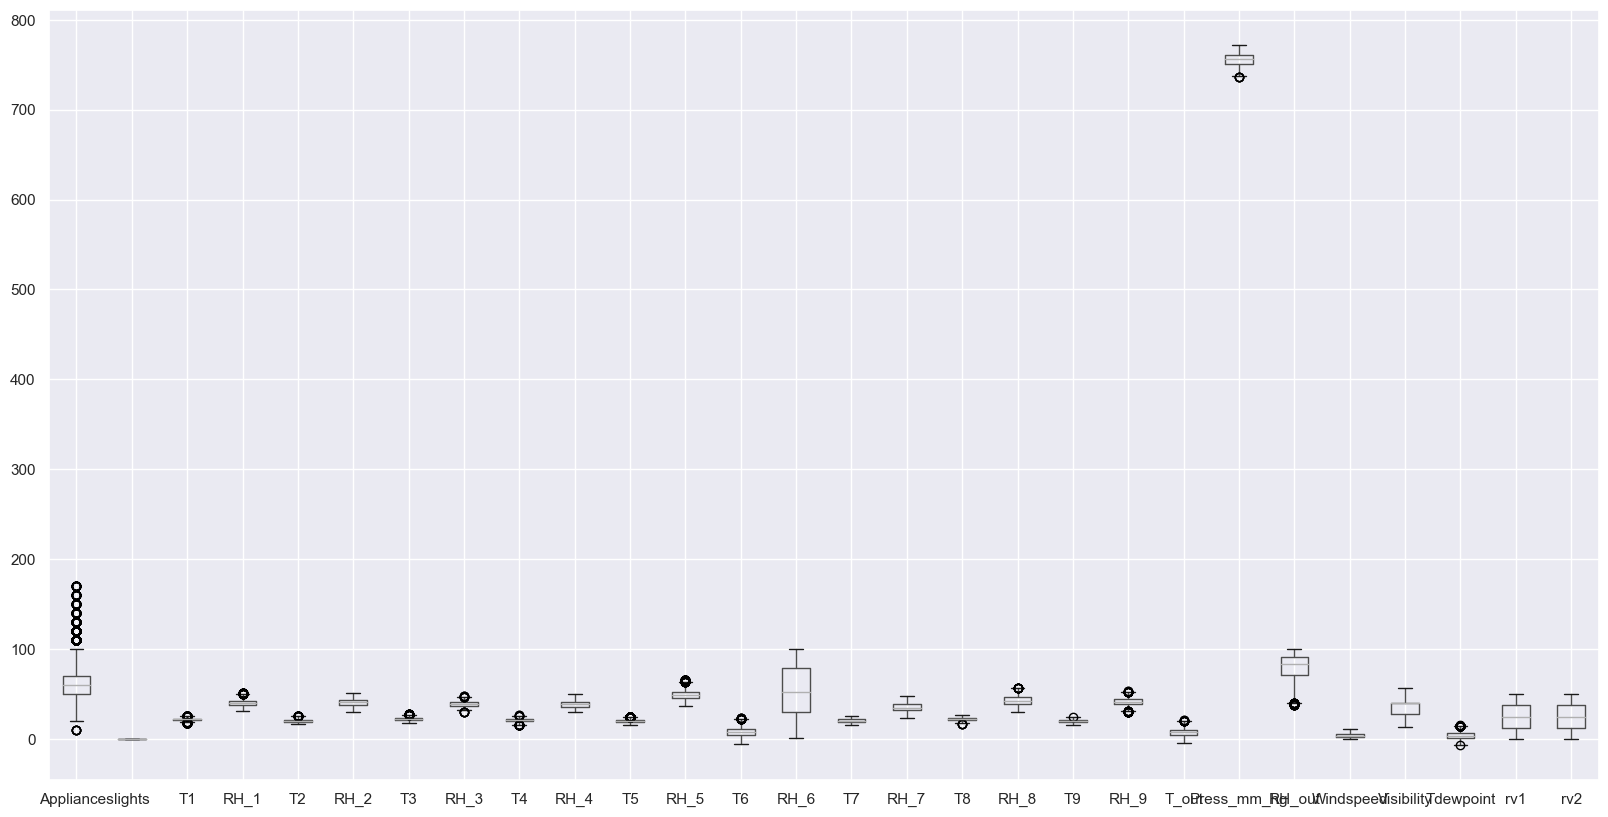

In [54]:
# creating a boxplot of all the numeric features
data.boxplot(figsize=(20, 10))
plt.show()

Subsequently, distplots for **'RH_6', 'RH_out', 'Visibility'** and **'Windspeed'** are drawn as independeant variables to depict their distribution pattern: 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16792\1171848086.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['RH_6'], bins=10, ax=ax1)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16792\1171848086.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['RH_out'], bins=10, ax=ax2)
C:\U

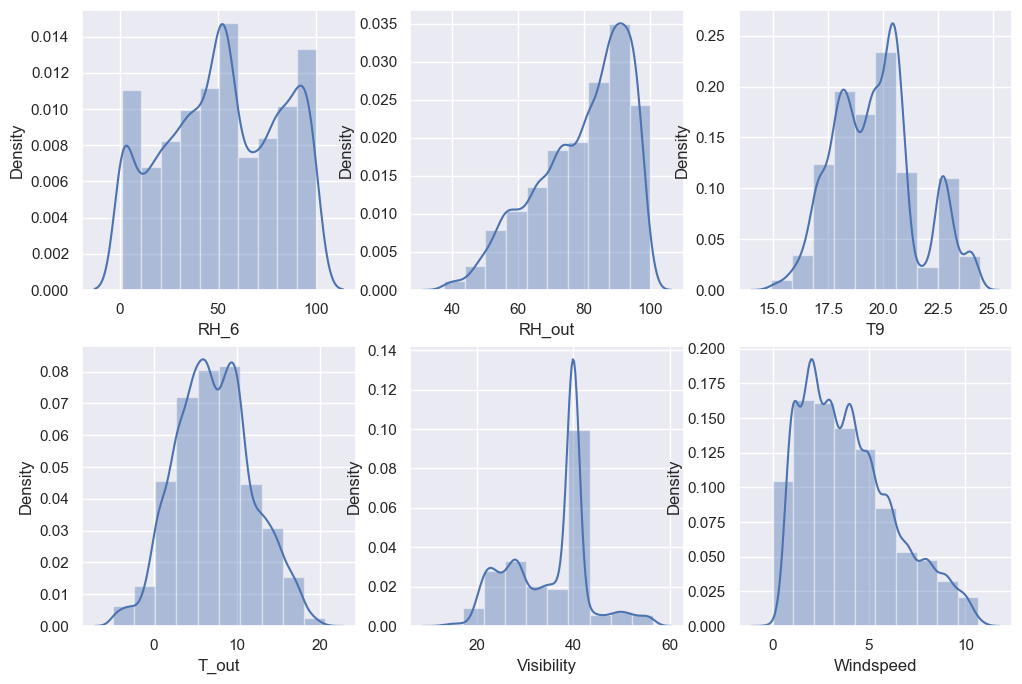

In [55]:
# creating a figure object with dimensions 12x8
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(2, 3, 1)
sns.distplot(data['RH_6'], bins=10, ax=ax1)
ax2 = fig.add_subplot(2, 3, 2)
sns.distplot(data['RH_out'], bins=10, ax=ax2)
ax4 = fig.add_subplot(2, 3, 3)
sns.distplot(data['T9'], bins=10, ax=ax4)
ax4 = fig.add_subplot(2, 3, 4)
sns.distplot(data['T_out'], bins=10, ax=ax4)
ax3 = fig.add_subplot(2, 3, 5)
sns.distplot(data['Visibility'], bins=10, ax=ax3)
ax4 = fig.add_subplot(2, 3, 6)
sns.distplot(data['Windspeed'], bins=10, ax=ax4)

plt.show()

The distribution pattern for the only dependent variable of the dataset, **'Appliances'** is as follows:

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_16792\1908943952.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Appliances'], bins=10, ax=ax)


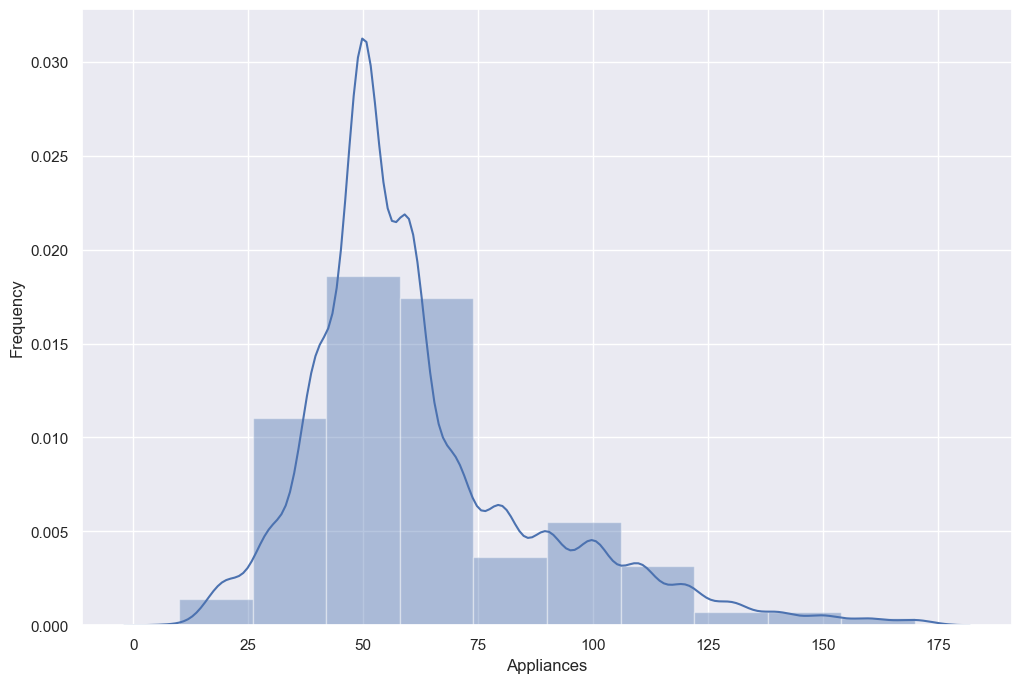

In [56]:
# plotting the distribution of 'Appliances' 
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlabel("Appliance's energy use in Wh")
ax.set_ylabel('Frequency')
sns.distplot(data['Appliances'], bins=10, ax=ax)
plt.show()

The following observations can be made from the distribution plots above:

- With the exception of RH_6 and RH_out, all humidity values inside the home follow a **Normal distribution**.

- All temperature readings, except for T9, also exhibit a **Normal distribution**.

- *Visibility, Windspeed, and Appliances* display skewness among the remaining columns.


The next part involves the plotting of a *correlation matrix* for the dataset:

In [57]:
# creating a correlation matrix
corr_matrix = data.corr()
print(corr_matrix)

             Appliances  lights        T1      RH_1        T2      RH_2   
Appliances     1.000000     NaN  0.239987 -0.060292  0.265978 -0.181583  \
lights              NaN     NaN       NaN       NaN       NaN       NaN   
T1             0.239987     NaN  1.000000  0.114657  0.797442  0.047379   
RH_1          -0.060292     NaN  0.114657  1.000000  0.260497  0.821356   
T2             0.265978     NaN  0.797442  0.260497  1.000000 -0.120701   
RH_2          -0.181583     NaN  0.047379  0.821356 -0.120701  1.000000   
T3             0.188010     NaN  0.892091  0.207747  0.665361  0.212771   
RH_3          -0.204548     NaN -0.084756  0.857766  0.093108  0.692462   
T4             0.201643     NaN  0.876179  0.076106  0.727336  0.003390   
RH_4          -0.133927     NaN  0.033622  0.900520  0.204480  0.743832   
T5             0.183275     NaN  0.882759  0.173780  0.661273  0.176195   
RH_5          -0.160129     NaN -0.101031  0.470416 -0.046224  0.420270   
T6             0.263940  

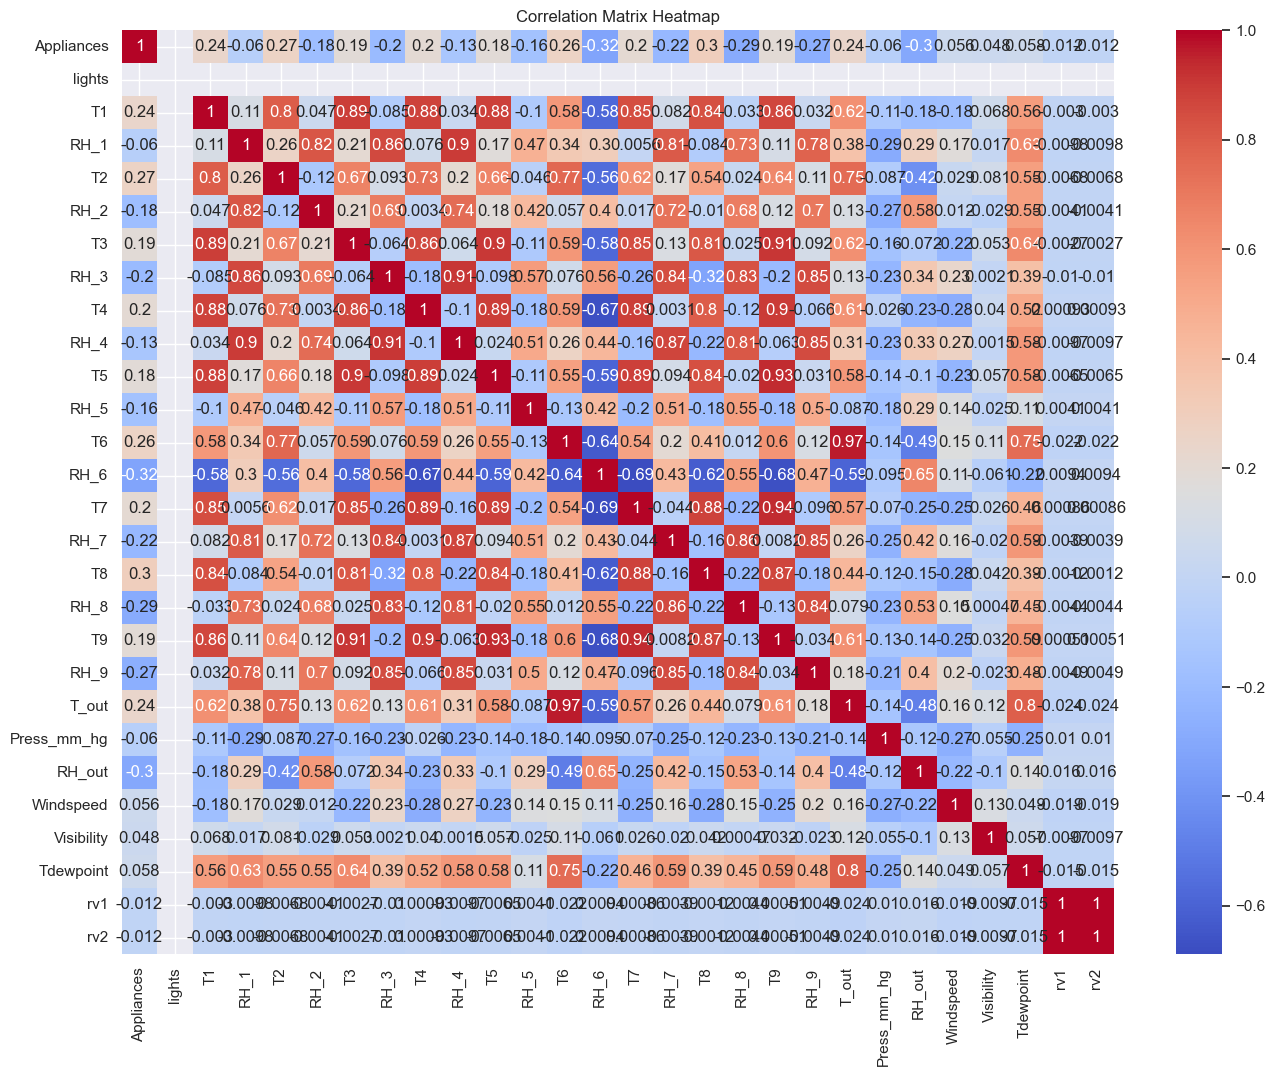

In [58]:
# plotting the correlation matrix
sns.set(font_scale=1.0)
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

According to the correlation matrix above:
- The temperature variables T1-T9 and T_out display a positive correlation with the target Appliances. 
- T9 has a high degree of correlation with T3, T5, T7, and T8, while T6 and T_Out also exhibit high correlation as they both represent outside temperatures. 
- T6 and T9 can be removed from the training set as their information can be obtained from other fields. 
- Weather attributes such as Visibility and Tdewpoint have low correlation values. 
- Humidity sensors do not show any significantly high correlation cases (> 0.9).
- There is a weak relationship between the target variable and the variables rv1, rv2, Visibility, Tdewpoint, and Press_mm_hg.

In [59]:
# dropping 'T6', 'T9', 'rv1', 'rv2', 'Visibility'
data.drop(['T6', 'T9', 'rv1', 'rv2', 'Visibility'],axis=1,inplace = True)

The following scatter plots are used to demonstrate the relationship between the temperatre and the humidity in the kitchen and the energy used by the appliances:

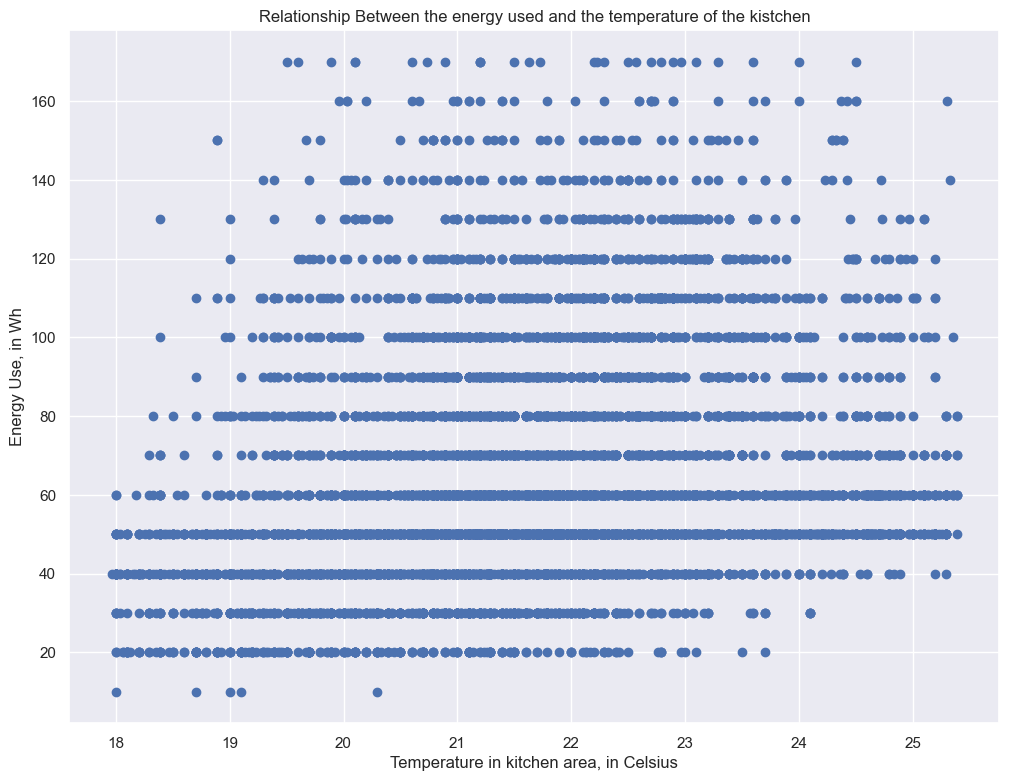

In [60]:
#The Tempreture
# defining the x and y variables
x = data['T1']
y = data['Appliances']


# creating a scatter plot of the difference vs y1
plt.scatter(x,y)
plt.xlabel("Temperature in kitchen area, in Celsius")
plt.ylabel("Energy Use, in Wh")
plt.title("Relationship Between the energy used and the temperature of the kistchen")
plt.show()

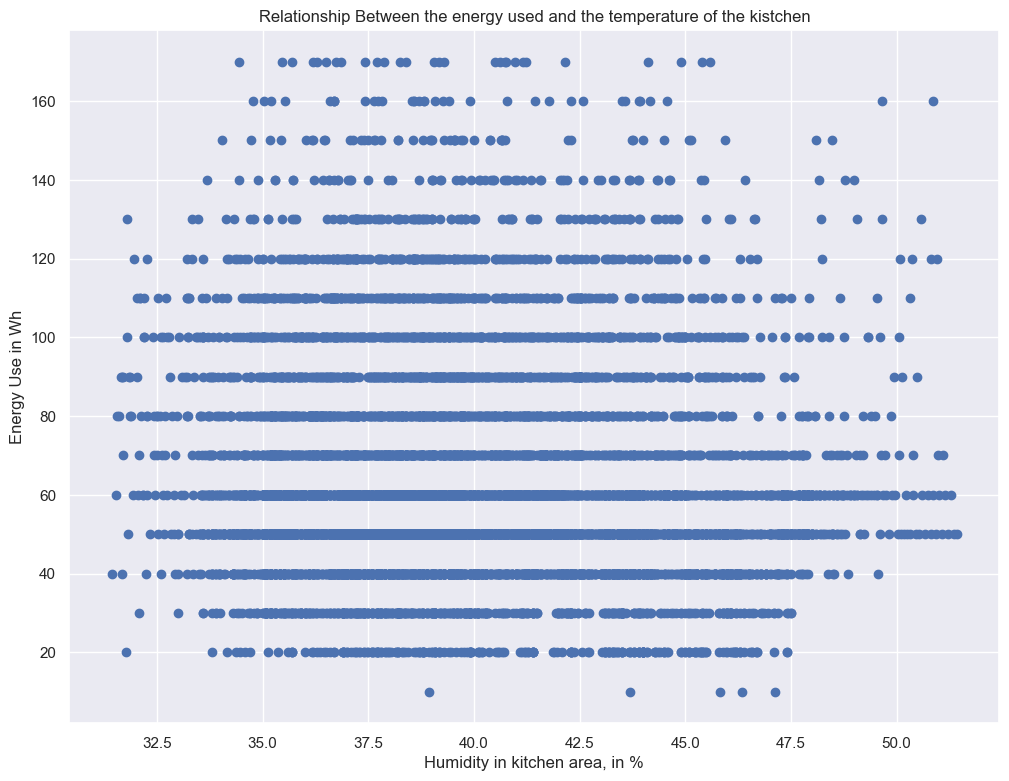

In [61]:
# The Humidity
# defining the x and y variables
x = data['RH_1']
y = data['Appliances']


# creating the scatter plot
plt.scatter(x,y)
plt.xlabel("Humidity in kitchen area, in %")
plt.ylabel("Energy Use in Wh")
plt.title("Relationship Between the energy used and the temperature of the kistchen")
plt.show()

-As shown in the two scatter plots above, appliances consume around 40-60 Wh of energythe kitchen temperature is between 18-25 celsius. On the other hand, appliances in a kitchen with the humidity percentage of 32-50 are likely to consume 50-60 Wh of electricity. 

Finally, the last two Hexbins are utilized to visualize the relationship between the temperatre and the humidity out and the energy used by the appliances:

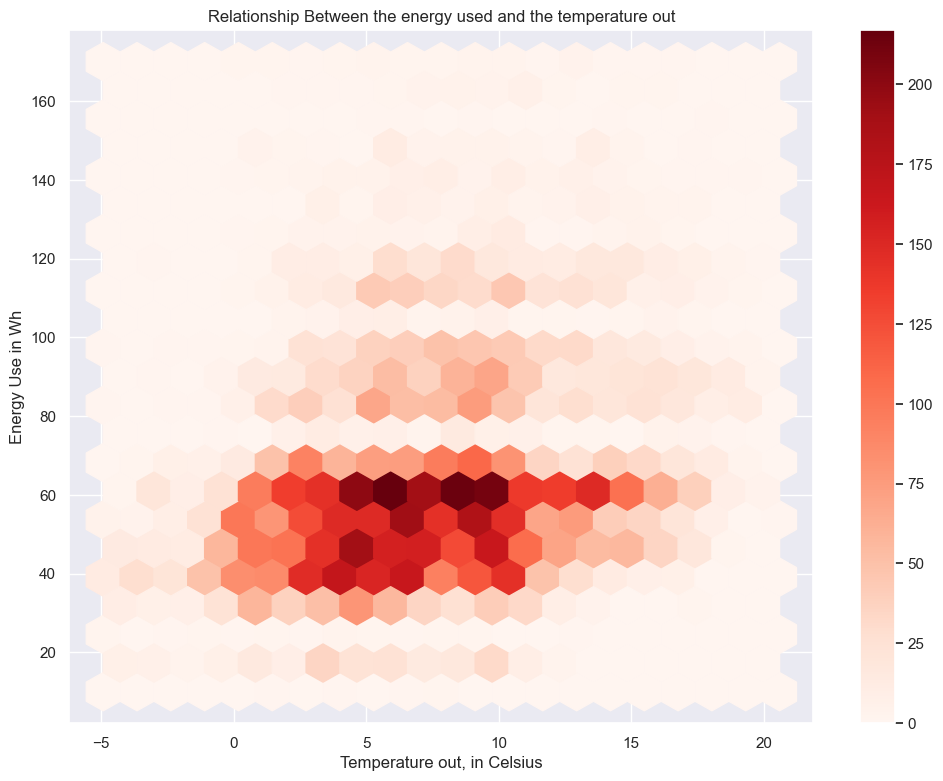

In [62]:
# defining x and y variables
x = data['T_out']
y = data['Appliances']

# creating the scatter plot
plt.hexbin(x, y, gridsize=20, cmap='Reds')
plt.colorbar()
plt.xlabel("Temperature out, in Celsius")
plt.ylabel("Energy Use in Wh")
plt.title("Relationship Between the energy used and the temperature out")
plt.show()

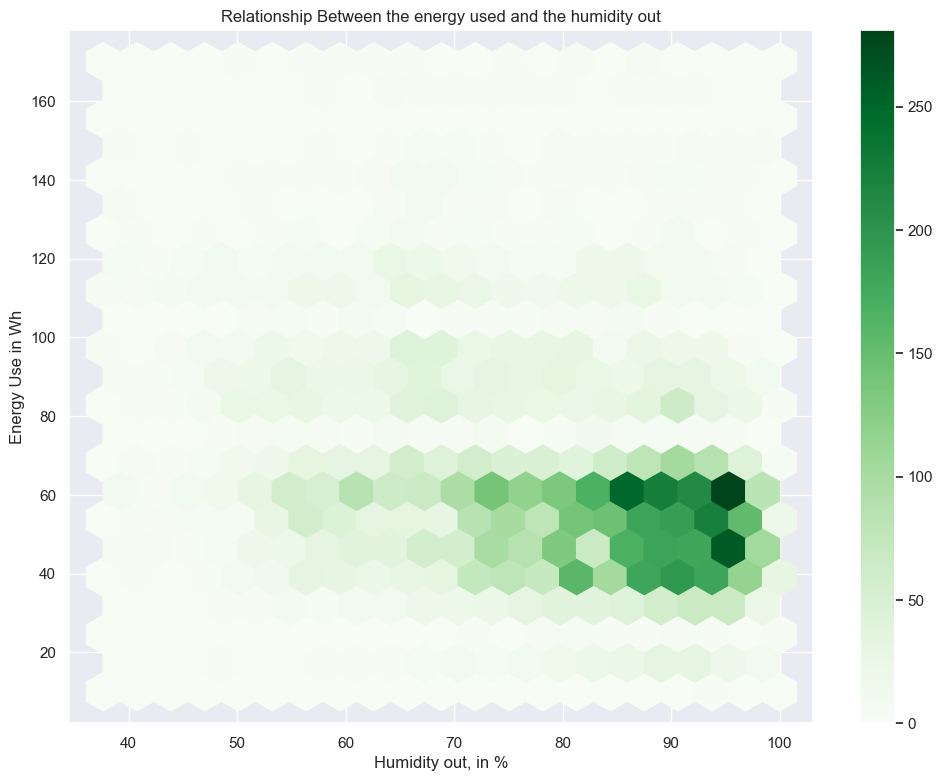

In [63]:
# defining x and y variables
x = data['RH_out']
y = data['Appliances']

# creating the hexbin plot
plt.hexbin(x, y, gridsize=20, cmap='Greens')
plt.colorbar()
plt.xlabel("Humidity out, in %")
plt.ylabel("Energy Use in Wh")
plt.title("Relationship Between the energy used and the humidity out")
plt.show()

As shown in the two scatter plots above, appliances consume a bigger portion of energy when the temperature out is between 4-9 celsius. On the other hand, the humidity percentage of 88-95 make appliances consume a higher level of electricity.

# Data Scaling:

In [75]:
# getting the shape of cleaned data
print(data.shape)

(10537, 23)


As of now, we have *10537 rows* and *23 columns* in our dataset, which are to be scaled using Standard Scaler to ensure that all of the features in the dataset are in a similar range:

In [76]:
# defining x and y
x = data.drop('Appliances', axis=1)
y = data['Appliances']

print(x[:5])

    lights         T1       RH_1     T2       RH_2         T3    RH_3   
51       0  20.926667  45.590000  20.29  44.290000  20.166667  45.530  \
52       0  20.890000  45.666667  20.23  44.290000  20.133333  45.500   
53       0  20.890000  46.060000  20.20  44.400000  20.200000  45.500   
54       0  20.790000  46.200000  20.20  44.466667  20.166667  45.500   
55       0  20.790000  46.200000  20.10  44.530000  20.125000  45.425   

           T4       RH_4         T5     RH_5       RH_6     T7       RH_7   
51  21.890000  46.966667  19.000000  50.0300  91.260000  17.79  45.863333  \
52  21.823333  46.226667  18.926667  50.0900  91.593333  17.79  45.826667   
53  21.666667  46.060000  18.890000  50.0900  91.760000  17.79  45.966667   
54  21.533333  45.933333  18.890000  50.1725  91.760000  17.79  46.000000   
55  21.356667  45.900000  18.890000  50.2000  91.833333  17.79  46.000000   

         T8       RH_8       RH_9     T_out  Press_mm_hg  RH_out  Windspeed   
51  19.2900  53.500

In [77]:
#scaling data
scaler = StandardScaler()
x = scaler.fit_transform(x)

print(x[:5])

[[ 0.         -0.50355366  1.59744811  0.07183185  0.99826362 -1.18085731
   2.15799983  0.53199688  2.0286264  -0.35610267  0.19142123  1.33585626
  -1.32723506  2.23953291 -1.44652064  2.13134752  1.18264564 -0.46998346
  -2.59703248  0.89931215  0.62869914  0.05758555]
 [ 0.         -0.52850484  1.6188524   0.03955342  0.99826362 -1.19916797
   2.14820022  0.49697159  1.84814109 -0.39815036  0.20214012  1.34727989
  -1.32723506  2.23177889 -1.44652064  2.22314695  1.2182416  -0.46633915
  -2.57750267  0.89931215  0.55810247  0.06180223]
 [ 0.         -0.52850484  1.7286657   0.02341421  1.02713905 -1.16254664
   2.14820022  0.41466218  1.80749125 -0.41917421  0.20214012  1.35299171
  -1.32723506  2.26138513 -1.44652064  2.32359416  1.26791039 -0.46269483
  -2.55797287  0.89931215  0.48750581  0.06601892]
 [ 0.         -0.59655349  1.76775179  0.02341421  1.04463931 -1.18085731
   2.14820022  0.34461161  1.77659737 -0.41917421  0.21687859  1.35299171
  -1.32723506  2.26843424 -1.4815

In [78]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [79]:
# printting the shapes of training and testing sets
print("X_train shape:", np.shape(X_train))
print("X_test shape:", np.shape(X_test))
print("y_train shape:", np.shape(y_train))
print("y_test shape:", np.shape(y_test))

X_train shape: (7902, 22)
X_test shape: (2635, 22)
y_train shape: (7902,)
y_test shape: (2635,)


# Model Implementation:

The Linear Regression model is implemented in two different formats to predict the energy use of house appliances based on the defined features:

1. From Scratch:

In [105]:
# computing cost function
def CostFunction(X_train,y_train,w,b):
    cost = np.sum((((X_train.dot(w) + b) - y_train) ** 2) / (2*len(y_train)))
    return cost

# getting cost function for intial w and b values
initial_w = np.ones(X_train.shape[1]) * 2
initial_b = np.ones(1) * 1
CostF = CostFunction(X_train, y_train, initial_w, initial_b)
print('Cost at initial w:', CostF)

Cost at initial w: 2426.2028380128386


Cost is: 1846.5014756763235
Cost is: 448.0713431049338
Cost is: 272.9050174813395
Cost is: 247.70039348975598
Cost is: 241.9688273099115
Cost is: 239.38548240462748
Cost is: 237.6824950717471
Cost is: 236.41243864652765
Cost is: 235.4149760887782
Cost is: 234.60391566655267


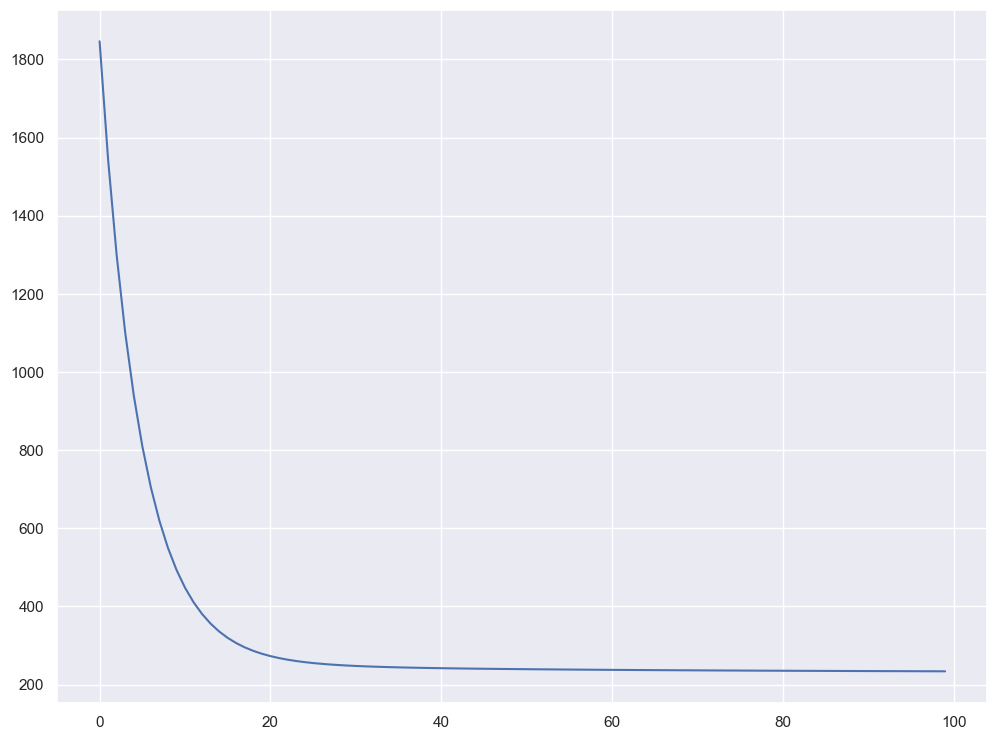

In [106]:
# computing gradient descent 
def GradientDescent(X_train, y_train, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = X_train.dot(w) + b
        loss = z - y_train
        
        weight_gradient = X_train.T.dot(loss) / len(y_train)
        bias_gradient = np.sum(loss) / len(y_train)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(X_train, y_train, w, b)
        cost_list[epoch] = cost
        
        if (epoch%10==0):
            print("Cost is:",cost)
        
    return w, b, cost_list

# performing gradient descent optimization on the training data
w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.1,epochs=100)

# plotting the value of cost over the number of epochs
plt.plot(c)

In [100]:
# implementing the prediction step of the model using the weights and biases learned
def predict(X_train, w, b):
    return X_train.dot(w) + b
y_pred = predict(X_test, w, b)

The next step is to evaluate our linear regression model using 3 diffreent metrics: 
    1. Mean Absolute Error 
    2. Mean Squared Error 
    3. R2 Score

MAE: 15.510802237846026
MSE: 456.71617879490253
R2_score: 0.291384138622534


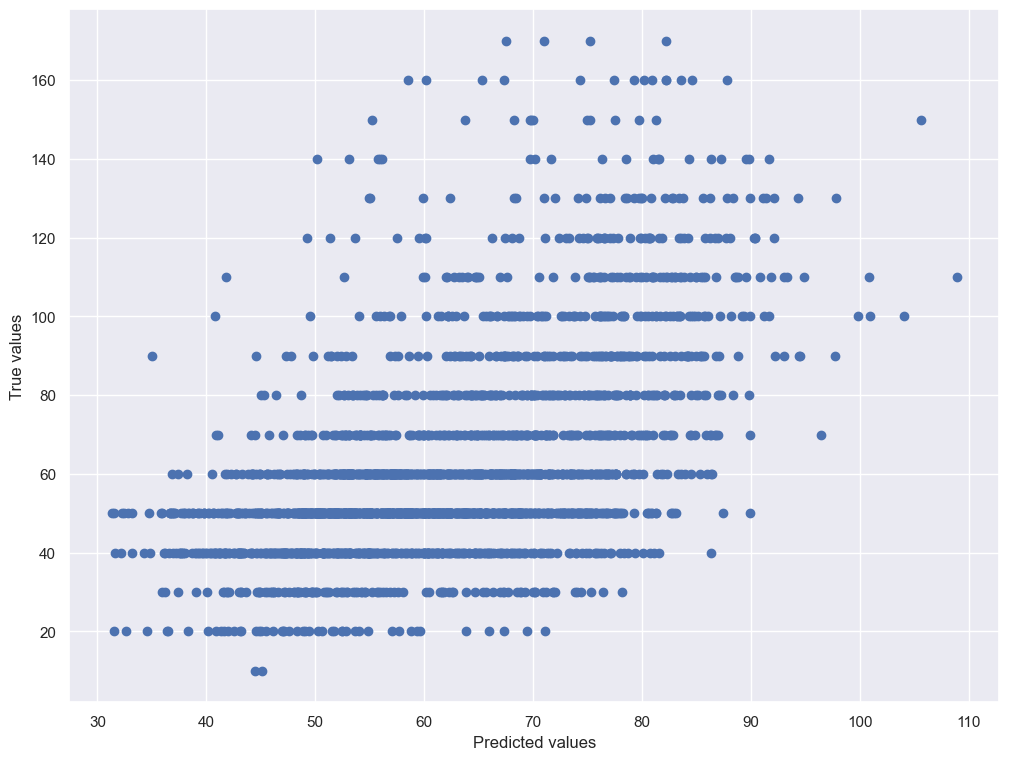

In [109]:
# evaluating the model
def print_metrics(y_test, y_pred):
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2_score = metrics.r2_score(y_test, y_pred)
    
    print('MAE:', mae)
    print('MSE:', mse)
    print('R2_score:', r2_score)

print_metrics(y_test, y_pred)

# plotting y_test and y_pred
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.show()

2. Using Sklearn:

In [111]:
# linear regression using sklearn
model = LinearRegression()
model.fit(X_train,y_train)
y_pred_2 = model.predict(X_test)

And here goes the evaluation step for linear regression using sklearn:

MAE: 15.15790773125115
MSE: 441.04230637480975
R2_score: 0.31570286242030043


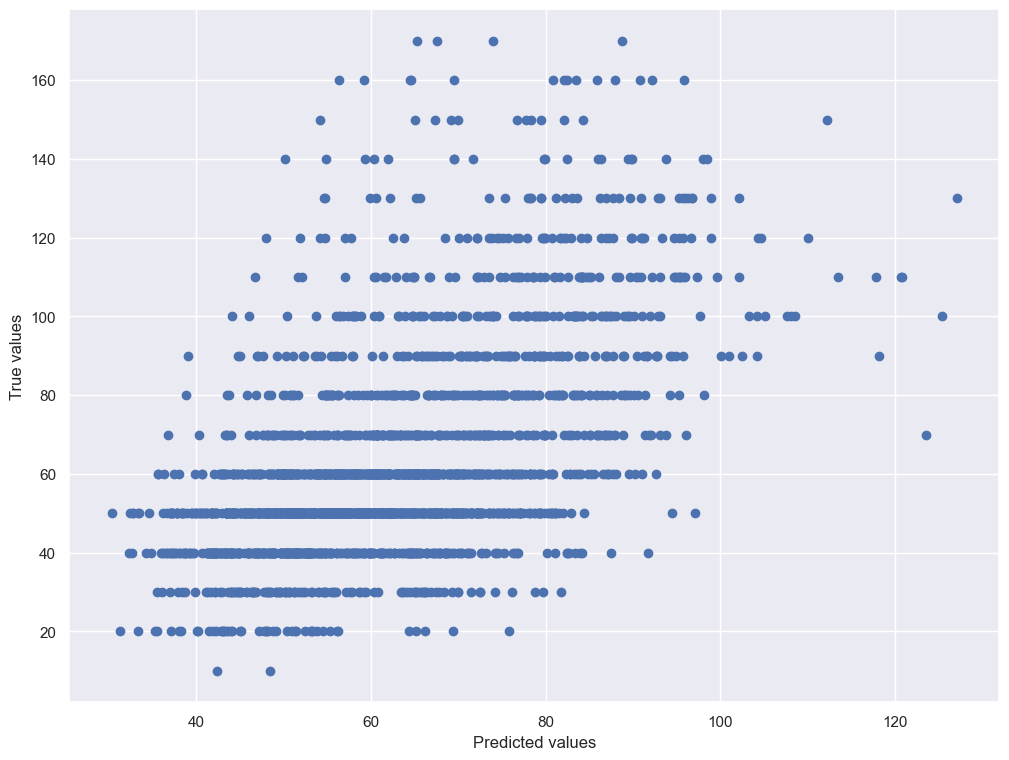

In [112]:
# evaluating the model
def print_metrics_2(y_test, y_pred_2):
    mae_2 = metrics.mean_absolute_error(y_test, y_pred_2)
    mse_2 = metrics.mean_squared_error(y_test, y_pred_2)
    r2_score_2 = metrics.r2_score(y_test, y_pred_2)
    
    print('MAE:', mae_2)
    print('MSE:', mse_2)
    print('R2_score:', r2_score_2)

print_metrics(y_test, y_pred_2)

# plotting y_test and y_pred_2
plt.scatter(y_pred_2, y_test)
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.show()

# Conclusion:
After preprocessing the data through cleaning of outliers, explored the dataset through EDA, scaled the dataset using Standard Scaler, and implemented a Linear Regression model both from scratch and using Sklearn, I have achieved a reasonable degree of accuracy in predicting the energy use of house appliances based on the defined features. The evaluation metrics show that the model is reasonably performing well.